packages:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

sns.set(color_codes=True)

In [3]:
client_df = pd.read_csv('client_data.csv')
price_df = pd.read_csv('price_data.csv')

data description


In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
client_df['date_activ'] = pd.to_datetime(client_df['date_activ'], format='%Y-%m-%d')
client_df['date_end'] = pd.to_datetime(client_df['date_end'], format='%Y-%m-%d')
client_df['date_modif_prod'] = pd.to_datetime(client_df['date_modif_prod'], format='%Y-%m-%d')
client_df['date_renewal'] = pd.to_datetime(client_df['date_renewal'], format='%Y-%m-%d')

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


The data seems to be right skewed since the big gap btw the mean and the max value point

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [10]:
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [11]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Visualizations - Column Distribution 

In [12]:
def plot_stackbar(dataframe, title_, size=(18,18), rot_=0, legend_='upper right' ):
    ax = dataframe.plot(kind='bar', stacked=True, figsize=size, rot=rot_)
    
    annotate_stackbar(ax, textsize=18)

    plt.legend(['Churned', 'Stayed'], loc=legend_)

    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stackbar(ax, pad=0.99, colour='white', textsize=13):
    for p in ax.patches: 
        value = str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(
            value, 
            ((p.get_x() + p.get_width() / 2)*pad - 0.05, (p.get_y() + p.get_height() / 2) * pad),
            color=colour,
            size=textsize,
        )


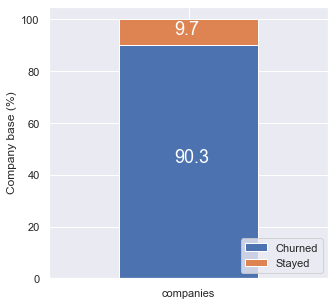

In [13]:
churn=client_df[['id','churn']]
churn.columns = ['companies', 'churn']  
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stackbar(churn_percentage.transpose(), "Churning status", (5,5), legend_='lower right')

SALES CHANEL

In [14]:
sales = client_df[['id', 'channel_sales', 'churn']]
sales_total = sales.groupby(['channel_sales', 'churn']).count()
sales_total = sales_total.unstack(level=1).fillna(0)


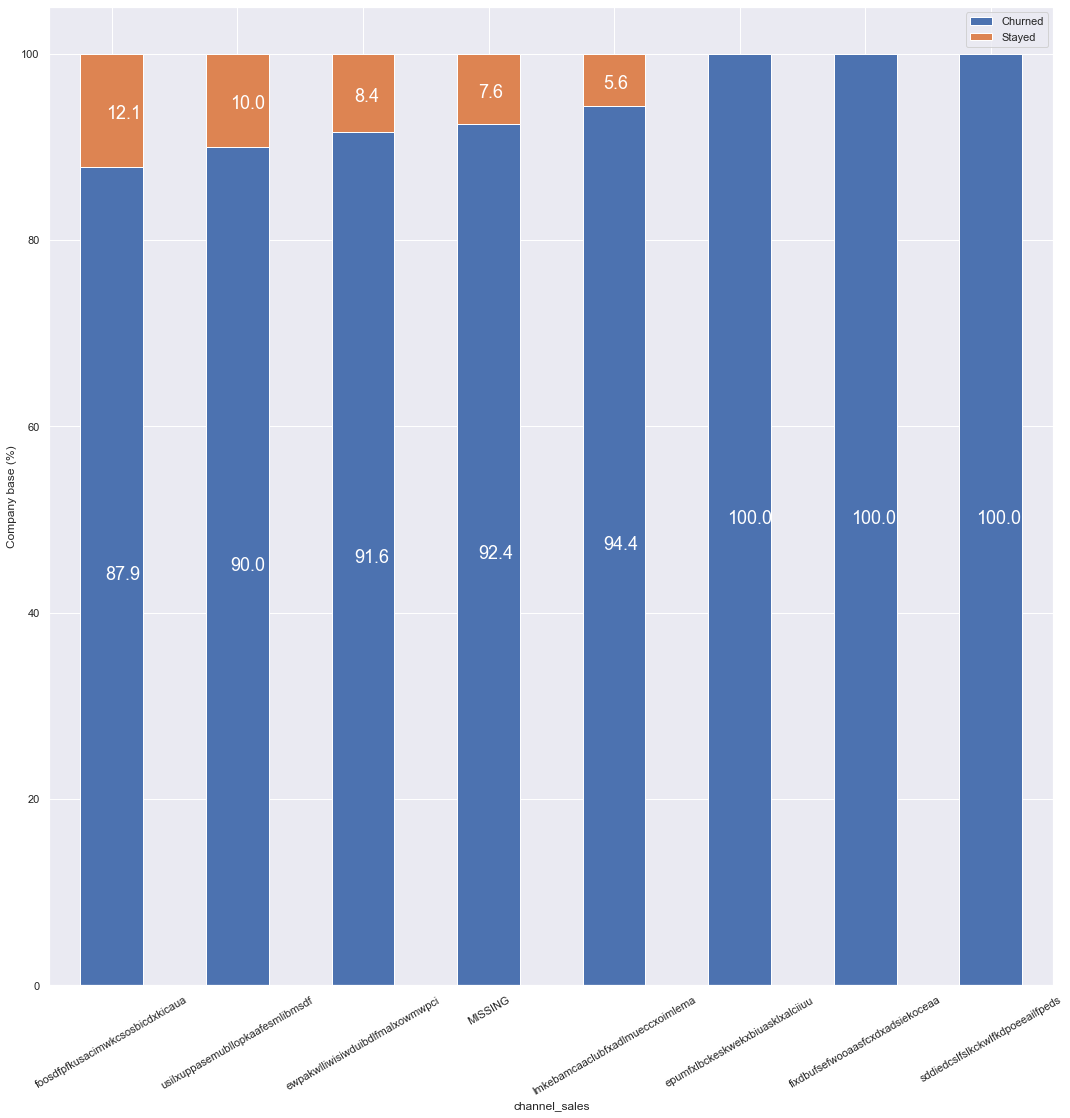

In [15]:
sales_churn = (sales_total.div(sales_total.sum(axis=1), axis=0) * 100)
sales_churn = sales_churn.sort_values(by=[("id", 1)], ascending=False)
plot_stackbar(sales_churn, "Sales Channel", rot_=30)

COMSUMPTION

In [16]:
def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({"Retention": dataframe[dataframe['churn'] == 0][column],
                         "Churn":dataframe[dataframe['churn'] == 1][column]})
    
    temp[["Retention", "Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

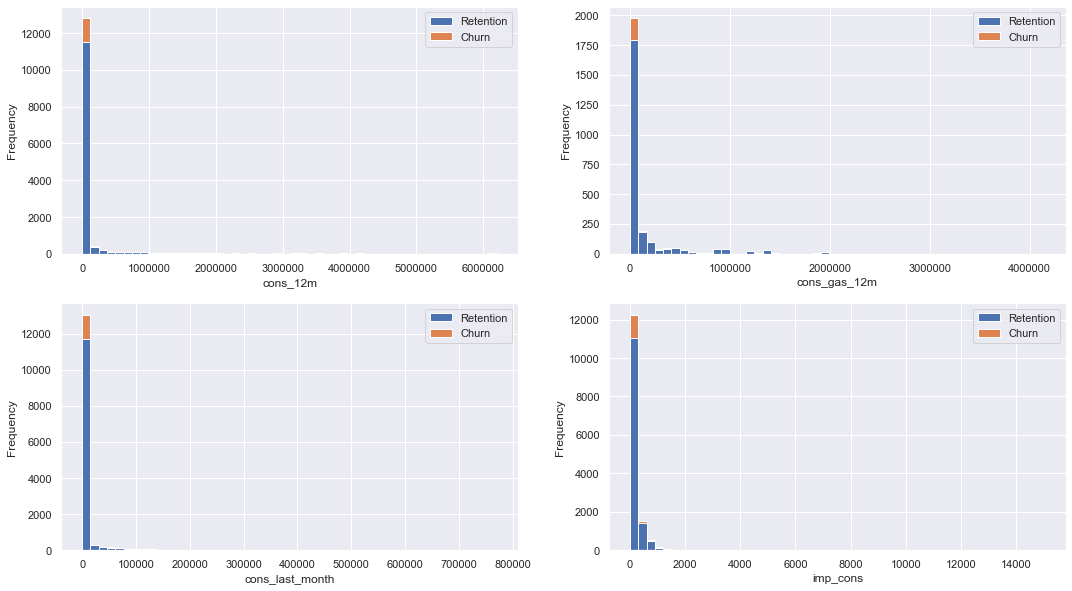

In [17]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
plot_distribution(consumption, 'cons_12m', axs[0,0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[0,1])
plot_distribution(consumption, 'cons_last_month', axs[1,0])
plot_distribution(consumption, 'imp_cons', axs[1,1])

boxplot

c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\lib\si

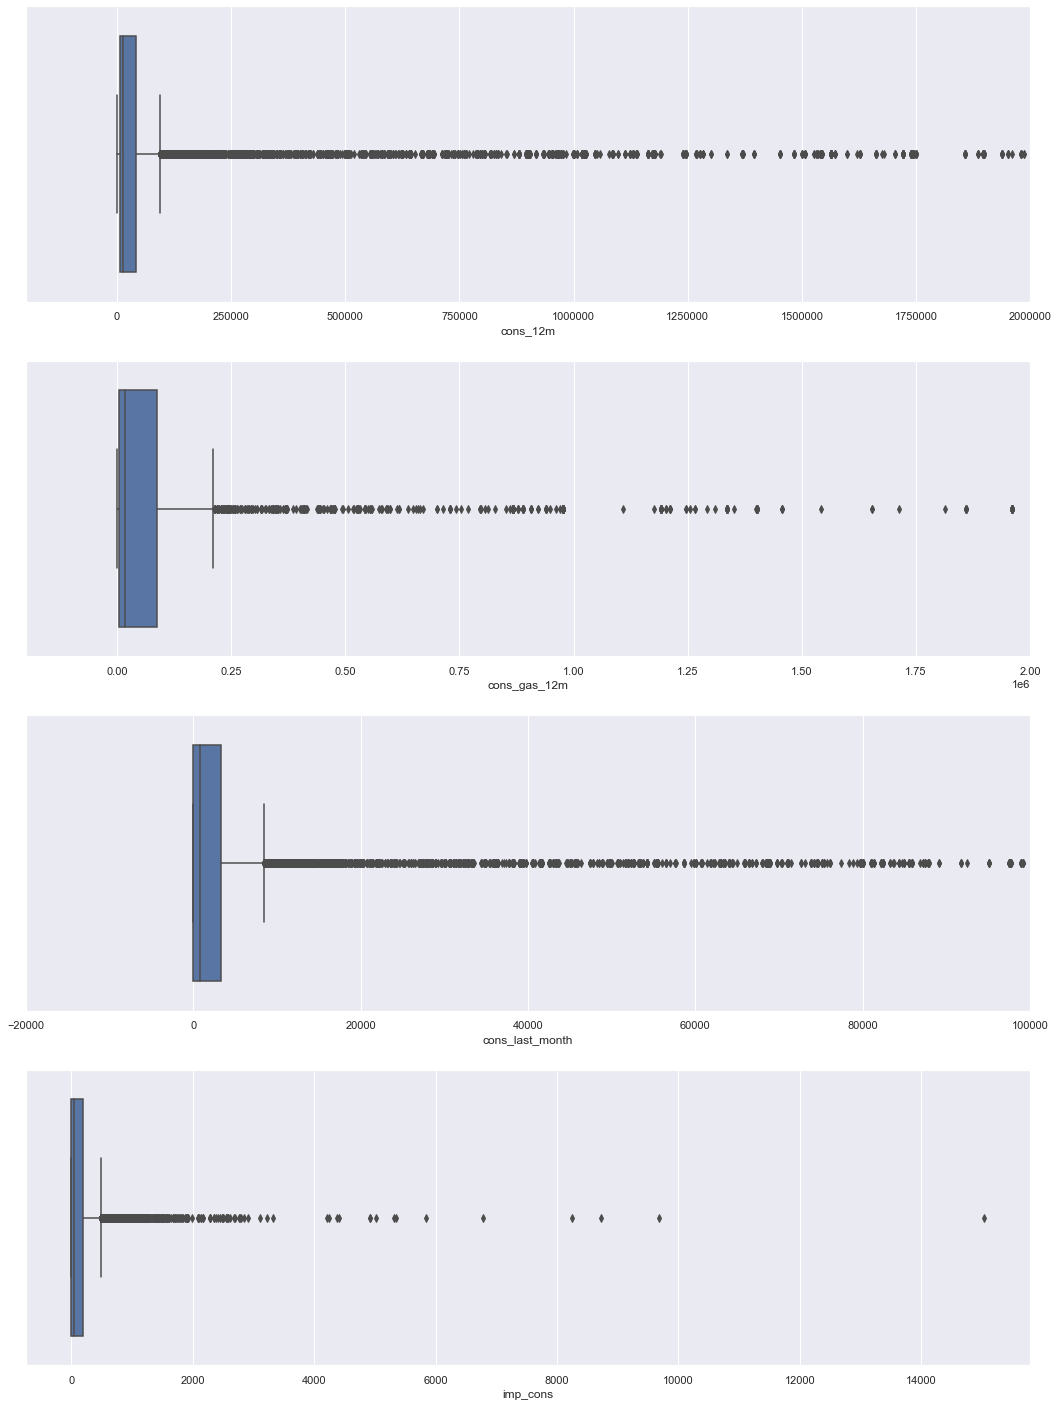

In [18]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

sns.boxplot(consumption['cons_12m'], ax=axs[0])
sns.boxplot(consumption[consumption['has_gas']=='t']['cons_gas_12m'], ax=axs[1])
sns.boxplot(consumption['cons_last_month'], ax=axs[2])
sns.boxplot(consumption['imp_cons'], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

In [19]:
def remove_outliers(dataframe, features):
    Q1 = dataframe[features].quantile(0.25)
    Q3 = dataframe[features].quantile(0.75)
    IQR = Q3 - Q1
    remove_outliers_df = dataframe[~((dataframe[features] < (Q1 - 1.5 * IQR)) |(dataframe[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return remove_outliers_df

In [20]:
remove_outliers_df = remove_outliers(consumption, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons'])

In [21]:
remove_outliers_df

,id,cons_12m,cons_gas_12m,cons_last_month,imp_cons,has_gas,churn
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,0.00,f,0
2,764c75f661154dac3a6c254cd082ea7d,544,0,0,0.00,f,0
3,bba03439a292a1e166f80264c16191cb,1584,0,0,0.00,f,0
4,149d57cf92fc41cf94415803a877cb4b,4425,0,526,52.32,f,0
5,1aa498825382410b098937d65c4ec26d,8302,0,1998,181.21,f,1
...,...,...,...,...,...,...,...
14598,1582ef35fbfa265e60bb3399bdebac87,9441,0,480,46.98,f,0
14602,d0a6f71671571ed83b2645d23af6de00,7223,0,181,15.94,f,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,1844,0,179,18.05,f,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,131,0,0,0.00,f,0


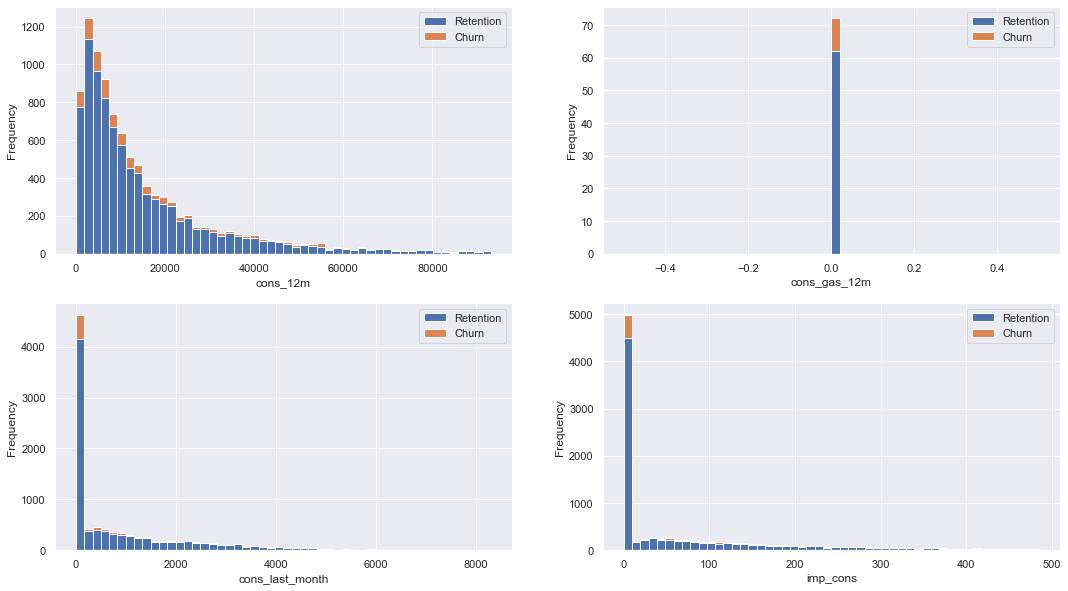

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
plot_distribution(remove_outliers_df, 'cons_12m', axs[0,0])
plot_distribution(remove_outliers_df[remove_outliers_df['has_gas'] == 't'], 'cons_gas_12m', axs[0,1])
plot_distribution(remove_outliers_df, 'cons_last_month', axs[1,0])
plot_distribution(remove_outliers_df, 'imp_cons', axs[1,1])

In [23]:
def outliners(dataframe, features):
    Q1 = dataframe[features].quantile(0.25)
    Q3 = dataframe[features].quantile(0.75)
    IQR = Q3 - Q1
    outliers_df = dataframe[((dataframe[features] < (Q1 - 1.5 * IQR)) |(dataframe[features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return outliers_df

In [25]:
outliers_cons = outliners(consumption, ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons'])

In [31]:
outliers_cons[['churn'==1]].count()

ValueError: Item wrong length 1 instead of 4691.

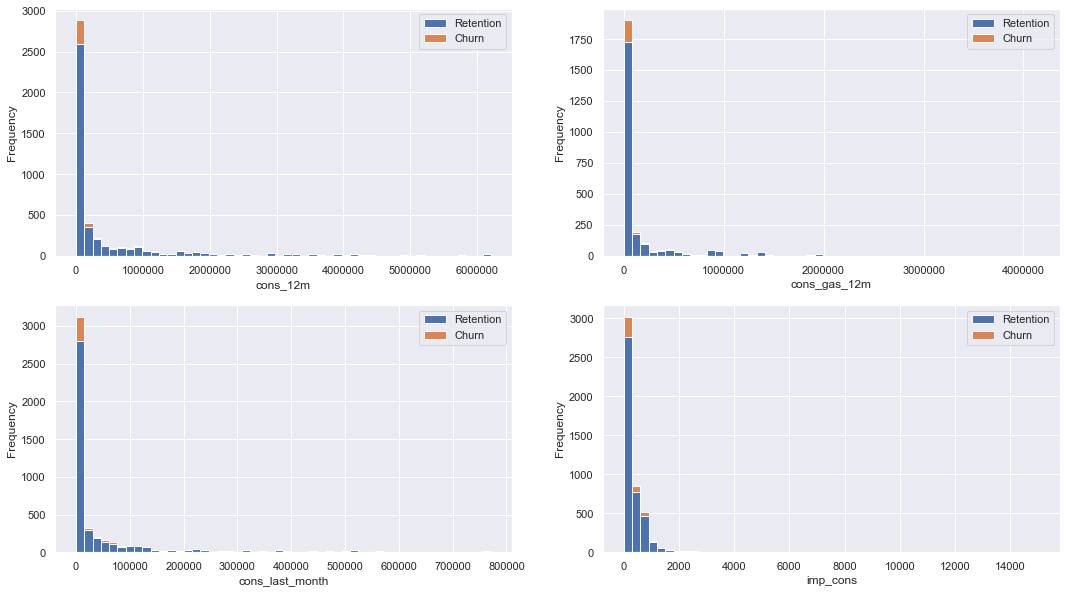

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,10))
plot_distribution(outliers_cons,'cons_12m', axs[0,0])
plot_distribution(outliers_cons[outliers_cons['has_gas'] == 't'], 'cons_gas_12m', axs[0,1])
plot_distribution(outliers_cons, 'cons_last_month', axs[1,0])
plot_distribution(outliers_cons, 'imp_cons', axs[1,1])